In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns

In [2]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely import wkt

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
from sklearn.cluster import KMeans

In [4]:
vul = pd.read_csv('data/out/v.csv')

In [50]:
vul

,Unnamed: 0,ZIP,pop2010,GEOID,geometry,vul
0,0,91356.0,4462,6037139301,"MULTIPOLYGON (((-118.571496 34.177579, -118.57...",0.176189
1,1,91356.0,4422,6037139302,"MULTIPOLYGON (((-118.540734 34.180195, -118.54...",-0.597622
2,2,91316.0,3007,6037139502,"MULTIPOLYGON (((-118.532245 34.16201, -118.531...",0.248734
3,3,91316.0,4633,6037139600,"MULTIPOLYGON (((-118.518583 34.158576, -118.51...",0.448743
4,4,91436.0,4920,6037139701,"MULTIPOLYGON (((-118.5098 34.156908, -118.5084...",0.755947
...,...,...,...,...,...,...
2340,8048,90004.0,3513,6037192700,"MULTIPOLYGON (((-118.29171 34.083588, -118.290...",-0.581355
2341,8049,90048.0,2037,6037194500,"MULTIPOLYGON (((-118.378802 34.07639, -118.378...",0.255105
2342,8050,90039.0,4717,6037195100,"MULTIPOLYGON (((-118.276908 34.095835, -118.27...",0.626143
2343,8051,90027.0,3203,6037195300,"MULTIPOLYGON (((-118.29177 34.10178, -118.2895...",0.337343


In [5]:
infra = pd.read_csv('data/out/infra.csv')

In [6]:
infra

,Unnamed: 0,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_mean,land_majority,impv_mean,dem_mean,geometry
0,0,599100,6037599100,5991.00,32.925570,-118.497290,0.215304,52.0,0.956937,226.110165,MULTIPOLYGON (((-118.4166287644724 32.79555493...
1,1,1710,6059001710,17.10,33.900231,-117.968440,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-117.9765923400579 33.90281815...
2,2,3308,6029003308,33.08,34.843283,-118.989749,0.000000,22.0,44.066667,1184.747640,MULTIPOLYGON (((-118.8895438238539 34.81790328...
3,3,137000,6037137000,1370.00,34.166115,-118.640235,8.745668,22.0,45.807251,281.206176,"MULTIPOLYGON (((-118.658618 34.171419, -118.65..."
4,4,541605,6037541605,5416.05,33.899344,-118.210002,1.401094,23.0,71.759344,21.508713,"MULTIPOLYGON (((-118.216298 33.903393, -118.21..."
...,...,...,...,...,...,...,...,...,...,...,...
2528,2528,189600,6037189600,1896.00,34.111260,-118.329799,9.065780,23.0,45.360680,175.437523,"MULTIPOLYGON (((-118.336981 34.10837, -118.336..."
2529,2529,189400,6037189400,1894.00,34.120081,-118.321143,14.083056,22.0,30.447398,237.594161,"MULTIPOLYGON (((-118.32676 34.111124, -118.326..."
2530,2530,181400,6037181400,1814.00,34.136719,-118.208874,4.293796,23.0,62.925182,182.338486,"MULTIPOLYGON (((-118.218967 34.139997, -118.21..."
2531,2531,1401,6059001401,14.01,33.940824,-117.941004,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-117.9330468992887 33.94608688...


##### Import a geopandas dataframe and pass crs to final geopandas df below

In [7]:
tr_treestats = gpd.GeoDataFrame.from_file('data/out/tracts_treestats.geojson')

In [8]:
coords = tr_treestats.crs

In [9]:
tr_treestats.geometry

0       MULTIPOLYGON (((-118.41663 32.79555, -118.4165...
1       MULTIPOLYGON (((-117.97659 33.90282, -117.9765...
2       MULTIPOLYGON (((-118.88954 34.81790, -118.8847...
3       MULTIPOLYGON (((-118.65862 34.17142, -118.6584...
4       MULTIPOLYGON (((-118.21630 33.90339, -118.2153...
                              ...                        
2528    MULTIPOLYGON (((-118.33698 34.10837, -118.3369...
2529    MULTIPOLYGON (((-118.32676 34.11112, -118.3267...
2530    MULTIPOLYGON (((-118.21897 34.14000, -118.2173...
2531    MULTIPOLYGON (((-117.93305 33.94609, -117.9330...
2532    MULTIPOLYGON (((-118.12345 33.78715, -118.1222...
Name: geometry, Length: 2533, dtype: geometry

## 1) Cluster with simplified dataframe of 2 ecological variables --> clst0, results0

In [51]:
test0 = infra[['tree_mean', 'impv_mean']].copy()

In [52]:
test0 = test0.dropna(axis="rows", how="any")

In [53]:
test0

,tree_mean,impv_mean
0,0.215304,0.956937
2,0.000000,44.066667
3,8.745668,45.807251
4,1.401094,71.759344
5,2.277339,65.446449
...,...,...
2527,0.971383,78.041335
2528,9.065780,45.360680
2529,14.083056,30.447398
2530,4.293796,62.925182


In [54]:
wcss0 = []

In [55]:
for i in range(1,11):
    km0 = KMeans(n_clusters = i, random_state = 0)
    km0.fit(test)
    wcss0.append(km0.inertia_)

#### Plot elbow curve

In [56]:
sns.set()

<function matplotlib.pyplot.show(close=None, block=None)>

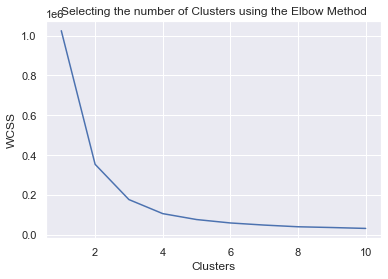

In [57]:
plt.plot(range(1,11), wcss0)
plt.title('Selecting the number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show

In [58]:
kmeans0 = KMeans(n_clusters=4)
kmeans0.fit(test0)
y_kmeans0 = kmeans0.predict(test0)

In [59]:
test0['cluster'] = pd.Series(y_kmeans0, index=test0.index)

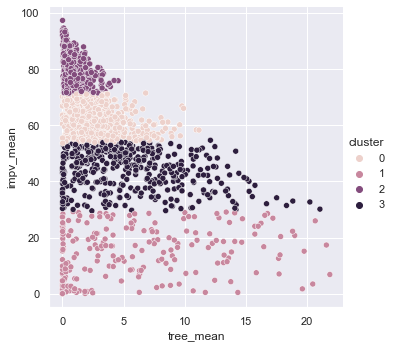

In [60]:
sns.relplot(x='tree_mean', y='impv_mean', hue = 'cluster', data=test0);

In [61]:
test0.groupby('cluster').agg(['count', 'min', 'max','mean'])['tree_mean']

,count,min,max,mean
cluster,,,,
0,987,0.0,11.156109,2.247772
1,227,0.0,21.842774,5.703892
2,847,0.0,4.549346,0.954820
3,456,0.0,21.032646,5.281303


In [97]:
test0

,tree_mean,impv_mean,cluster
0,0.215304,0.956937,1
2,0.000000,44.066667,3
3,8.745668,45.807251,3
4,1.401094,71.759344,2
5,2.277339,65.446449,0
...,...,...,...
2527,0.971383,78.041335,2
2528,9.065780,45.360680,3
2529,14.083056,30.447398,3
2530,4.293796,62.925182,0


#### Merge (outer) infra + vul dataframes; add test0 cluster results; first requires dropping infra's na's

In [101]:
infra_na = infra.dropna(subset = ['tree_mean', 'impv_mean'], axis = 'rows')
infra_na

,Unnamed: 0,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_mean,land_majority,impv_mean,dem_mean,geometry
0,0,599100,6037599100,5991.00,32.925570,-118.497290,0.215304,52.0,0.956937,226.110165,MULTIPOLYGON (((-118.4166287644724 32.79555493...
2,2,3308,6029003308,33.08,34.843283,-118.989749,0.000000,22.0,44.066667,1184.747640,MULTIPOLYGON (((-118.8895438238539 34.81790328...
3,3,137000,6037137000,1370.00,34.166115,-118.640235,8.745668,22.0,45.807251,281.206176,"MULTIPOLYGON (((-118.658618 34.171419, -118.65..."
4,4,541605,6037541605,5416.05,33.899344,-118.210002,1.401094,23.0,71.759344,21.508713,"MULTIPOLYGON (((-118.216298 33.903393, -118.21..."
5,5,541801,6037541801,5418.01,33.911804,-118.194675,2.277339,23.0,65.446449,24.308732,"MULTIPOLYGON (((-118.199979 33.906677, -118.19..."
...,...,...,...,...,...,...,...,...,...,...,...
2527,2527,480902,6037480902,4809.02,34.080280,-118.138926,0.971383,23.0,78.041335,138.571439,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447..."
2528,2528,189600,6037189600,1896.00,34.111260,-118.329799,9.065780,23.0,45.360680,175.437523,"MULTIPOLYGON (((-118.336981 34.10837, -118.336..."
2529,2529,189400,6037189400,1894.00,34.120081,-118.321143,14.083056,22.0,30.447398,237.594161,"MULTIPOLYGON (((-118.32676 34.111124, -118.326..."
2530,2530,181400,6037181400,1814.00,34.136719,-118.208874,4.293796,23.0,62.925182,182.338486,"MULTIPOLYGON (((-118.218967 34.139997, -118.21..."


In [102]:
merge0 = pd.merge(infra_na, vul, how ='left', on = 'GEOID', sort = False, 
                 copy = True, indicator = False, validate = None)
merge0

,Unnamed: 0_x,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_mean,land_majority,impv_mean,dem_mean,geometry_x,Unnamed: 0_y,ZIP,pop2010,geometry_y,vul
0,0,599100,6037599100,5991.00,32.925570,-118.497290,0.215304,52.0,0.956937,226.110165,MULTIPOLYGON (((-118.4166287644724 32.79555493...,872.0,90704.0,527.0,"MULTIPOLYGON (((-118.668203 33.485937, -118.66...",NaN
1,2,3308,6029003308,33.08,34.843283,-118.989749,0.000000,22.0,44.066667,1184.747640,MULTIPOLYGON (((-118.8895438238539 34.81790328...,NaN,NaN,NaN,NaN,NaN
2,3,137000,6037137000,1370.00,34.166115,-118.640235,8.745668,22.0,45.807251,281.206176,"MULTIPOLYGON (((-118.658618 34.171419, -118.65...",NaN,NaN,NaN,NaN,NaN
3,4,541605,6037541605,5416.05,33.899344,-118.210002,1.401094,23.0,71.759344,21.508713,"MULTIPOLYGON (((-118.216298 33.903393, -118.21...",2570.0,90221.0,5323.0,"MULTIPOLYGON (((-118.216298 33.903393, -118.21...",-0.585446
4,5,541801,6037541801,5418.01,33.911804,-118.194675,2.277339,23.0,65.446449,24.308732,"MULTIPOLYGON (((-118.199979 33.906677, -118.19...",2571.0,90262.0,4903.0,"MULTIPOLYGON (((-118.199979 33.906677, -118.19...",-0.516531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2527,480902,6037480902,4809.02,34.080280,-118.138926,0.971383,23.0,78.041335,138.571439,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447...",3043.0,91803.0,4218.0,"MULTIPOLYGON (((-118.146905 34.079705, -118.14...",-0.129946
2513,2528,189600,6037189600,1896.00,34.111260,-118.329799,9.065780,23.0,45.360680,175.437523,"MULTIPOLYGON (((-118.336981 34.10837, -118.336...",3045.0,90068.0,3529.0,"MULTIPOLYGON (((-118.336981 34.10837, -118.336...",-0.215253
2514,2529,189400,6037189400,1894.00,34.120081,-118.321143,14.083056,22.0,30.447398,237.594161,"MULTIPOLYGON (((-118.32676 34.111124, -118.326...",3046.0,90068.0,3448.0,"MULTIPOLYGON (((-118.32676 34.111124, -118.326...",0.508082
2515,2530,181400,6037181400,1814.00,34.136719,-118.208874,4.293796,23.0,62.925182,182.338486,"MULTIPOLYGON (((-118.218967 34.139997, -118.21...",3048.0,90041.0,4302.0,"MULTIPOLYGON (((-118.218967 34.139997, -118.21...",0.239630


##### Add cluster0 variable to merged dataframe, now with equal number of rows as test0

In [104]:
merge0['cluster'] = pd.Series(y_kmeans0, index=merge0.index)
merge0

,Unnamed: 0_x,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_mean,land_majority,impv_mean,dem_mean,geometry_x,Unnamed: 0_y,ZIP,pop2010,geometry_y,vul,cluster
0,0,599100,6037599100,5991.00,32.925570,-118.497290,0.215304,52.0,0.956937,226.110165,MULTIPOLYGON (((-118.4166287644724 32.79555493...,872.0,90704.0,527.0,"MULTIPOLYGON (((-118.668203 33.485937, -118.66...",NaN,1
1,2,3308,6029003308,33.08,34.843283,-118.989749,0.000000,22.0,44.066667,1184.747640,MULTIPOLYGON (((-118.8895438238539 34.81790328...,NaN,NaN,NaN,NaN,NaN,3
2,3,137000,6037137000,1370.00,34.166115,-118.640235,8.745668,22.0,45.807251,281.206176,"MULTIPOLYGON (((-118.658618 34.171419, -118.65...",NaN,NaN,NaN,NaN,NaN,3
3,4,541605,6037541605,5416.05,33.899344,-118.210002,1.401094,23.0,71.759344,21.508713,"MULTIPOLYGON (((-118.216298 33.903393, -118.21...",2570.0,90221.0,5323.0,"MULTIPOLYGON (((-118.216298 33.903393, -118.21...",-0.585446,2
4,5,541801,6037541801,5418.01,33.911804,-118.194675,2.277339,23.0,65.446449,24.308732,"MULTIPOLYGON (((-118.199979 33.906677, -118.19...",2571.0,90262.0,4903.0,"MULTIPOLYGON (((-118.199979 33.906677, -118.19...",-0.516531,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2527,480902,6037480902,4809.02,34.080280,-118.138926,0.971383,23.0,78.041335,138.571439,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447...",3043.0,91803.0,4218.0,"MULTIPOLYGON (((-118.146905 34.079705, -118.14...",-0.129946,2
2513,2528,189600,6037189600,1896.00,34.111260,-118.329799,9.065780,23.0,45.360680,175.437523,"MULTIPOLYGON (((-118.336981 34.10837, -118.336...",3045.0,90068.0,3529.0,"MULTIPOLYGON (((-118.336981 34.10837, -118.336...",-0.215253,3
2514,2529,189400,6037189400,1894.00,34.120081,-118.321143,14.083056,22.0,30.447398,237.594161,"MULTIPOLYGON (((-118.32676 34.111124, -118.326...",3046.0,90068.0,3448.0,"MULTIPOLYGON (((-118.32676 34.111124, -118.326...",0.508082,3
2515,2530,181400,6037181400,1814.00,34.136719,-118.208874,4.293796,23.0,62.925182,182.338486,"MULTIPOLYGON (((-118.218967 34.139997, -118.21...",3048.0,90041.0,4302.0,"MULTIPOLYGON (((-118.218967 34.139997, -118.21...",0.239630,0


In [112]:
results0 = merge0[['GEOID', 'ZIP', 'tree_mean', 'land_majority', 'impv_mean', 'dem_mean', 'vul', 'pop2010', 'cluster', 'geometry_x']]
results0 = results0.rename(columns = {'geometry_x': 'geometry'})

In [113]:
results0

,GEOID,ZIP,tree_mean,land_majority,impv_mean,dem_mean,vul,pop2010,cluster,geometry
0,6037599100,90704.0,0.215304,52.0,0.956937,226.110165,NaN,527.0,1,MULTIPOLYGON (((-118.4166287644724 32.79555493...
1,6029003308,NaN,0.000000,22.0,44.066667,1184.747640,NaN,NaN,3,MULTIPOLYGON (((-118.8895438238539 34.81790328...
2,6037137000,NaN,8.745668,22.0,45.807251,281.206176,NaN,NaN,3,"MULTIPOLYGON (((-118.658618 34.171419, -118.65..."
3,6037541605,90221.0,1.401094,23.0,71.759344,21.508713,-0.585446,5323.0,2,"MULTIPOLYGON (((-118.216298 33.903393, -118.21..."
4,6037541801,90262.0,2.277339,23.0,65.446449,24.308732,-0.516531,4903.0,0,"MULTIPOLYGON (((-118.199979 33.906677, -118.19..."
...,...,...,...,...,...,...,...,...,...,...
2512,6037480902,91803.0,0.971383,23.0,78.041335,138.571439,-0.129946,4218.0,2,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447..."
2513,6037189600,90068.0,9.065780,23.0,45.360680,175.437523,-0.215253,3529.0,3,"MULTIPOLYGON (((-118.336981 34.10837, -118.336..."
2514,6037189400,90068.0,14.083056,22.0,30.447398,237.594161,0.508082,3448.0,3,"MULTIPOLYGON (((-118.32676 34.111124, -118.326..."
2515,6037181400,90041.0,4.293796,23.0,62.925182,182.338486,0.239630,4302.0,0,"MULTIPOLYGON (((-118.218967 34.139997, -118.21..."


In [114]:
results0 = GeoDataFrame(results0)

In [115]:
results0['geometry'] = results0['geometry'].apply(wkt.loads)

In [116]:
results0.__class__ = gpd.GeoDataFrame
results0.crs = {}
results0.set_geometry('geometry')
results0.to_file('data/out/results0.geojson', driver="GeoJSON")

/var/folders/22/w9k9dn754d7bwv89pbvgxw080000gn/T/ipykernel_28873/418395218.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sm)


<AxesSubplot:title={'center':'Clustered Los Angeles Census Tracts'}>

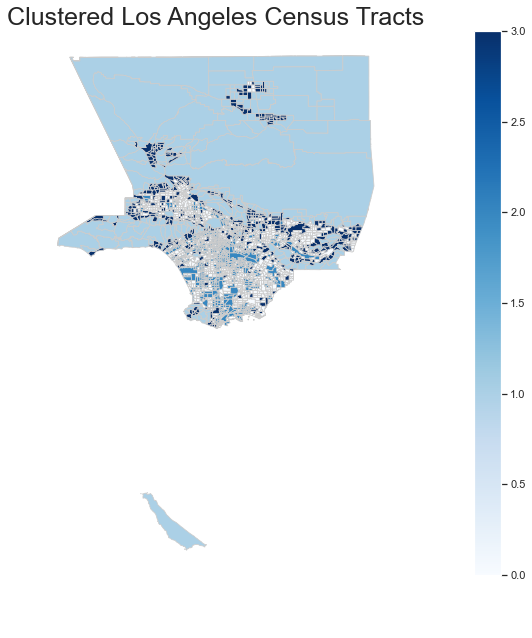

In [117]:
# set the value column that will be visualised
variable = 'cluster'

# set the range for the choropleth values
vmin, vmax = 0, 3

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Clustered Los Angeles Census Tracts', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Data Sources: MRLC.gov and https://healthyplacesindex.org/', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# add the colorbar to the figure
fig.colorbar(sm)
# create map
results0.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


## 2) Cluster integrated vulnerability and ecological variables --> clst1, results1

#### Join the two dataframes on GEOID

In [62]:
infra.dropna(axis="rows", how="any")

,Unnamed: 0,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_mean,land_majority,impv_mean,dem_mean,geometry
0,0,599100,6037599100,5991.00,32.925570,-118.497290,0.215304,52.0,0.956937,226.110165,MULTIPOLYGON (((-118.4166287644724 32.79555493...
2,2,3308,6029003308,33.08,34.843283,-118.989749,0.000000,22.0,44.066667,1184.747640,MULTIPOLYGON (((-118.8895438238539 34.81790328...
3,3,137000,6037137000,1370.00,34.166115,-118.640235,8.745668,22.0,45.807251,281.206176,"MULTIPOLYGON (((-118.658618 34.171419, -118.65..."
4,4,541605,6037541605,5416.05,33.899344,-118.210002,1.401094,23.0,71.759344,21.508713,"MULTIPOLYGON (((-118.216298 33.903393, -118.21..."
5,5,541801,6037541801,5418.01,33.911804,-118.194675,2.277339,23.0,65.446449,24.308732,"MULTIPOLYGON (((-118.199979 33.906677, -118.19..."
...,...,...,...,...,...,...,...,...,...,...,...
2527,2527,480902,6037480902,4809.02,34.080280,-118.138926,0.971383,23.0,78.041335,138.571439,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447..."
2528,2528,189600,6037189600,1896.00,34.111260,-118.329799,9.065780,23.0,45.360680,175.437523,"MULTIPOLYGON (((-118.336981 34.10837, -118.336..."
2529,2529,189400,6037189400,1894.00,34.120081,-118.321143,14.083056,22.0,30.447398,237.594161,"MULTIPOLYGON (((-118.32676 34.111124, -118.326..."
2530,2530,181400,6037181400,1814.00,34.136719,-118.208874,4.293796,23.0,62.925182,182.338486,"MULTIPOLYGON (((-118.218967 34.139997, -118.21..."


In [63]:
vul = vul.rename(columns = {'CensusTract': 'GEOID'})
vul

,Unnamed: 0,ZIP,pop2010,GEOID,geometry,vul
0,0,91356.0,4462,6037139301,"MULTIPOLYGON (((-118.571496 34.177579, -118.57...",0.176189
1,1,91356.0,4422,6037139302,"MULTIPOLYGON (((-118.540734 34.180195, -118.54...",-0.597622
2,2,91316.0,3007,6037139502,"MULTIPOLYGON (((-118.532245 34.16201, -118.531...",0.248734
3,3,91316.0,4633,6037139600,"MULTIPOLYGON (((-118.518583 34.158576, -118.51...",0.448743
4,4,91436.0,4920,6037139701,"MULTIPOLYGON (((-118.5098 34.156908, -118.5084...",0.755947
...,...,...,...,...,...,...
2340,8048,90004.0,3513,6037192700,"MULTIPOLYGON (((-118.29171 34.083588, -118.290...",-0.581355
2341,8049,90048.0,2037,6037194500,"MULTIPOLYGON (((-118.378802 34.07639, -118.378...",0.255105
2342,8050,90039.0,4717,6037195100,"MULTIPOLYGON (((-118.276908 34.095835, -118.27...",0.626143
2343,8051,90027.0,3203,6037195300,"MULTIPOLYGON (((-118.29177 34.10178, -118.2895...",0.337343


In [65]:
test1 = pd.merge(infra, vul, how ='inner', on = 'GEOID', sort = False, 
                 copy = True, indicator = False, validate = None).dropna(axis="rows", how="any")
test1

,Unnamed: 0_x,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_mean,land_majority,impv_mean,dem_mean,geometry_x,Unnamed: 0_y,ZIP,pop2010,geometry_y,vul
1,4,541605,6037541605,5416.05,33.899344,-118.210002,1.401094,23.0,71.759344,21.508713,"MULTIPOLYGON (((-118.216298 33.903393, -118.21...",2570,90221.0,5323,"MULTIPOLYGON (((-118.216298 33.903393, -118.21...",-0.585446
2,5,541801,6037541801,5418.01,33.911804,-118.194675,2.277339,23.0,65.446449,24.308732,"MULTIPOLYGON (((-118.199979 33.906677, -118.19...",2571,90262.0,4903,"MULTIPOLYGON (((-118.199979 33.906677, -118.19...",-0.516531
3,6,541802,6037541802,5418.02,33.909880,-118.186675,2.123907,23.0,63.546647,24.440263,"MULTIPOLYGON (((-118.19359 33.906542, -118.193...",2582,90262.0,5431,"MULTIPOLYGON (((-118.193753 33.906147, -118.19...",-0.426446
4,7,542000,6037542000,5420.00,33.905571,-118.203158,2.488353,23.0,62.310316,22.896972,"MULTIPOLYGON (((-118.207337 33.907321, -118.20...",2583,90221.0,5732,"MULTIPOLYGON (((-118.207337 33.907321, -118.20...",-0.498291
5,8,573800,6037573800,5738.00,33.824212,-118.098412,4.685759,23.0,56.614293,9.985991,"MULTIPOLYGON (((-118.109003 33.819121, -118.10...",2604,90808.0,4284,"MULTIPOLYGON (((-118.109003 33.819121, -118.10...",0.458502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2526,300501,6037300501,3005.01,34.220689,-118.240049,3.935402,23.0,52.853705,447.889465,"MULTIPOLYGON (((-118.248753 34.222495, -118.24...",6402,91214.0,3868,"MULTIPOLYGON (((-118.248753 34.222495, -118.24...",0.443941
2013,2527,480902,6037480902,4809.02,34.080280,-118.138926,0.971383,23.0,78.041335,138.571439,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447...",3043,91803.0,4218,"MULTIPOLYGON (((-118.146905 34.079705, -118.14...",-0.129946
2014,2528,189600,6037189600,1896.00,34.111260,-118.329799,9.065780,23.0,45.360680,175.437523,"MULTIPOLYGON (((-118.336981 34.10837, -118.336...",3045,90068.0,3529,"MULTIPOLYGON (((-118.336981 34.10837, -118.336...",-0.215253
2015,2529,189400,6037189400,1894.00,34.120081,-118.321143,14.083056,22.0,30.447398,237.594161,"MULTIPOLYGON (((-118.32676 34.111124, -118.326...",3046,90068.0,3448,"MULTIPOLYGON (((-118.32676 34.111124, -118.326...",0.508082


In [66]:
test1.describe()

,Unnamed: 0_x,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_mean,land_majority,impv_mean,dem_mean,Unnamed: 0_y,ZIP,pop2010,vul
count,1968.000000,1968.000000,1.968000e+03,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,1229.635671,390599.259146,6.037391e+09,3905.992591,34.061544,-118.254144,2.708679,24.762195,62.124193,152.285867,3912.806402,90814.250508,4149.387195,-0.150855
std,790.831051,214227.442831,2.142274e+05,2142.274428,0.169277,0.184833,3.216578,7.259820,18.202645,163.589108,2326.760908,774.812770,1211.432479,0.519170
min,4.000000,101110.000000,6.037101e+09,1011.100000,33.708857,-118.861046,0.000000,21.000000,0.471028,2.508811,0.000000,90001.000000,1512.000000,-1.543588
25%,533.750000,208583.000000,6.037209e+09,2085.830000,33.958250,-118.379853,0.812146,23.000000,53.825882,39.334341,2084.750000,90061.000000,3237.750000,-0.563455
50%,1093.500000,403317.500000,6.037403e+09,4033.175000,34.053994,-118.271735,1.583497,23.000000,65.714543,95.206172,3330.500000,90706.000000,4064.000000,-0.197317
75%,2027.250000,543305.250000,6.037543e+09,5433.052500,34.149180,-118.145535,3.130076,23.000000,74.888806,225.859612,5834.250000,91354.000000,4985.250000,0.259449
max,2530.000000,920339.000000,6.037920e+09,9203.390000,34.746448,-117.713487,21.842774,81.000000,97.365204,1103.354548,8056.000000,93591.000000,7720.000000,1.377370


In [67]:
wcss1 = []

In [69]:
clst1 = test1[['vul', 'pop2010', 'tree_mean','land_majority', 'impv_mean']]
clst1

,vul,pop2010,tree_mean,land_majority,impv_mean
1,-0.585446,5323,1.401094,23.0,71.759344
2,-0.516531,4903,2.277339,23.0,65.446449
3,-0.426446,5431,2.123907,23.0,63.546647
4,-0.498291,5732,2.488353,23.0,62.310316
5,0.458502,4284,4.685759,23.0,56.614293
...,...,...,...,...,...
2012,0.443941,3868,3.935402,23.0,52.853705
2013,-0.129946,4218,0.971383,23.0,78.041335
2014,-0.215253,3529,9.065780,23.0,45.360680
2015,0.508082,3448,14.083056,22.0,30.447398


In [70]:
for i in range(1,11):
    km1 = KMeans(n_clusters = i, random_state = 0)
    km1.fit(clst1)
    wcss1.append(km1.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

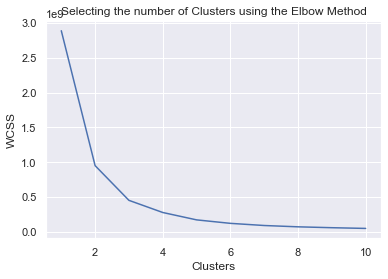

In [71]:
plt.plot(range(1,11), wcss1)
plt.title('Selecting the number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show

In [72]:
kmeans1 = KMeans(n_clusters=4)
kmeans1.fit(clst1)
y_kmeans1 = kmeans1.predict(clst1)

In [73]:
clst1['cluster'] = pd.Series(y_kmeans1, index=clst1.index)

/var/folders/22/w9k9dn754d7bwv89pbvgxw080000gn/T/ipykernel_28873/3079307614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clst1['cluster'] = pd.Series(y_kmeans1, index=clst1.index)


In [74]:
clst1.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=1968)

In [75]:
print(clst1)

           vul  pop2010  tree_mean  land_majority  impv_mean  cluster
1    -0.585446     5323   1.401094           23.0  71.759344        3
2    -0.516531     4903   2.277339           23.0  65.446449        3
3    -0.426446     5431   2.123907           23.0  63.546647        3
4    -0.498291     5732   2.488353           23.0  62.310316        1
5     0.458502     4284   4.685759           23.0  56.614293        0
...        ...      ...        ...            ...        ...      ...
2012  0.443941     3868   3.935402           23.0  52.853705        0
2013 -0.129946     4218   0.971383           23.0  78.041335        0
2014 -0.215253     3529   9.065780           23.0  45.360680        0
2015  0.508082     3448  14.083056           22.0  30.447398        0
2016  0.239630     4302   4.293796           23.0  62.925182        0

[1968 rows x 6 columns]


In [35]:
# sns.relplot(x='vul', y='dem_median', hue = 'cluster', data=infra_vul)

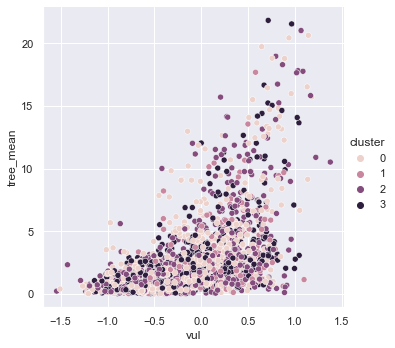

In [76]:
sns.relplot(x='vul', y='tree_mean', hue = 'cluster', data=clst1)

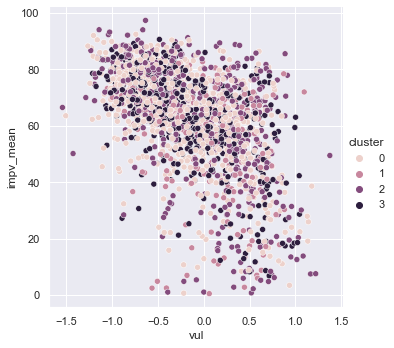

In [77]:
sns.relplot(x='vul', y='impv_mean', hue = 'cluster', data=clst1)

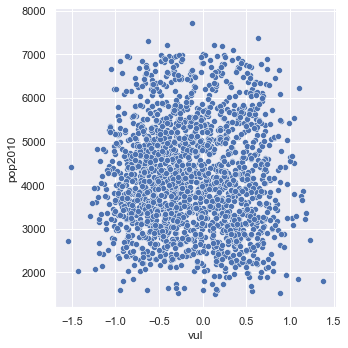

In [78]:
sns.relplot(x='vul', y='pop2010', data=clst1)

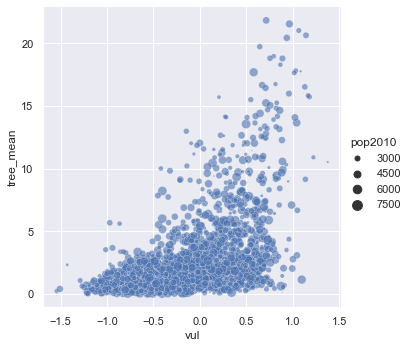

In [80]:
sns.relplot(x='vul', y='tree_mean', size = 'pop2010', sizes=(1, 100), alpha = 0.6 ,data=clst1)

### Join pandas dataframe back to geometry and convert to geopandas for each version of clustering

##### 1) Left: vul; right: infra_vul w/clusters --> clst1

In [93]:
merge1 = pd.merge(test1, clst1)

In [94]:
merge1 = GeoDataFrame(merged1)

In [95]:
merge1

,Unnamed: 0_x,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_mean,land_majority,impv_mean,dem_mean,geometry_x,Unnamed: 0_y,ZIP,pop2010,geometry_y,vul,cluster
0,4,541605,6037541605,5416.05,33.899344,-118.210002,1.401094,23.0,71.759344,21.508713,"MULTIPOLYGON (((-118.216298 33.903393, -118.21...",2570,90221.0,5323,"MULTIPOLYGON (((-118.216298 33.903393, -118.21...",-0.585446,3
1,5,541801,6037541801,5418.01,33.911804,-118.194675,2.277339,23.0,65.446449,24.308732,"MULTIPOLYGON (((-118.199979 33.906677, -118.19...",2571,90262.0,4903,"MULTIPOLYGON (((-118.199979 33.906677, -118.19...",-0.516531,3
2,6,541802,6037541802,5418.02,33.909880,-118.186675,2.123907,23.0,63.546647,24.440263,"MULTIPOLYGON (((-118.19359 33.906542, -118.193...",2582,90262.0,5431,"MULTIPOLYGON (((-118.193753 33.906147, -118.19...",-0.426446,3
3,7,542000,6037542000,5420.00,33.905571,-118.203158,2.488353,23.0,62.310316,22.896972,"MULTIPOLYGON (((-118.207337 33.907321, -118.20...",2583,90221.0,5732,"MULTIPOLYGON (((-118.207337 33.907321, -118.20...",-0.498291,1
4,8,573800,6037573800,5738.00,33.824212,-118.098412,4.685759,23.0,56.614293,9.985991,"MULTIPOLYGON (((-118.109003 33.819121, -118.10...",2604,90808.0,4284,"MULTIPOLYGON (((-118.109003 33.819121, -118.10...",0.458502,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,2526,300501,6037300501,3005.01,34.220689,-118.240049,3.935402,23.0,52.853705,447.889465,"MULTIPOLYGON (((-118.248753 34.222495, -118.24...",6402,91214.0,3868,"MULTIPOLYGON (((-118.248753 34.222495, -118.24...",0.443941,0
1964,2527,480902,6037480902,4809.02,34.080280,-118.138926,0.971383,23.0,78.041335,138.571439,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447...",3043,91803.0,4218,"MULTIPOLYGON (((-118.146905 34.079705, -118.14...",-0.129946,0
1965,2528,189600,6037189600,1896.00,34.111260,-118.329799,9.065780,23.0,45.360680,175.437523,"MULTIPOLYGON (((-118.336981 34.10837, -118.336...",3045,90068.0,3529,"MULTIPOLYGON (((-118.336981 34.10837, -118.336...",-0.215253,0
1966,2529,189400,6037189400,1894.00,34.120081,-118.321143,14.083056,22.0,30.447398,237.594161,"MULTIPOLYGON (((-118.32676 34.111124, -118.326...",3046,90068.0,3448,"MULTIPOLYGON (((-118.32676 34.111124, -118.326...",0.508082,0


In [96]:
results1 = merge1[['GEOID', 'tree_mean', 'land_majority', 'impv_mean', 'dem_mean', 'vul', 'pop2010', 'cluster', 'geometry_x']]
results1 = results1.rename(columns = {'geometry_x': 'geometry'})
results1

,GEOID,tree_mean,land_majority,impv_mean,dem_mean,vul,pop2010,cluster,geometry
0,6037541605,1.401094,23.0,71.759344,21.508713,-0.585446,5323,3,"MULTIPOLYGON (((-118.216298 33.903393, -118.21..."
1,6037541801,2.277339,23.0,65.446449,24.308732,-0.516531,4903,3,"MULTIPOLYGON (((-118.199979 33.906677, -118.19..."
2,6037541802,2.123907,23.0,63.546647,24.440263,-0.426446,5431,3,"MULTIPOLYGON (((-118.19359 33.906542, -118.193..."
3,6037542000,2.488353,23.0,62.310316,22.896972,-0.498291,5732,1,"MULTIPOLYGON (((-118.207337 33.907321, -118.20..."
4,6037573800,4.685759,23.0,56.614293,9.985991,0.458502,4284,0,"MULTIPOLYGON (((-118.109003 33.819121, -118.10..."
...,...,...,...,...,...,...,...,...,...
1963,6037300501,3.935402,23.0,52.853705,447.889465,0.443941,3868,0,"MULTIPOLYGON (((-118.248753 34.222495, -118.24..."
1964,6037480902,0.971383,23.0,78.041335,138.571439,-0.129946,4218,0,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447..."
1965,6037189600,9.065780,23.0,45.360680,175.437523,-0.215253,3529,0,"MULTIPOLYGON (((-118.336981 34.10837, -118.336..."
1966,6037189400,14.083056,22.0,30.447398,237.594161,0.508082,3448,0,"MULTIPOLYGON (((-118.32676 34.111124, -118.326..."


In [85]:
results1 = GeoDataFrame(results1)

In [86]:
results1['geometry'] = results1['geometry'].apply(wkt.loads)

##### 2) Clustering without social indexing, only ecological

In [ ]:
merged2 = pd.merge(test, infra_vul)

In [ ]:
merged2 = GeoDataFrame(merged2)

In [ ]:
type(merged2)

In [ ]:
cls1 = merged1[['GEOID', 'tree_mean', 'land_majority', 'impv_mean', 'dem_mean', 'vul', 'pop2010', 'cluster', 'geometry_x']]
cls1 = cls1.rename(columns = {'geometry_x': 'geometry'})
cls1

In [ ]:
cls1 = GeoDataFrame(cls1)

In [ ]:
cls1['geometry'] = cls1['geometry'].apply(wkt.loads)

## Re-run cluster analysis with social variables only: more meaningful result?

In [ ]:
vul_cl = test2[['vul', 'land_majority']]

In [ ]:
wcss3 = []

In [ ]:
for i in range(1,11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(vul_cl)
    wcss3.append(km.inertia_)

In [ ]:
plt.plot(range(1,11), wcss3)
plt.title('Selecting the number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(vul_cl)
y_kmeans2 = kmeans.predict(vul_cl)

In [ ]:
vul_cl['cluster'] = pd.Series(y_kmeans2, index=vul_cl.index)

In [ ]:
vul_cl

In [ ]:
sns.relplot(x='vul', y='land_majority', hue = 'cluster', data=vul_cl)

In [ ]:
vul_cl.groupby('cluster').agg(['count', 'min', 'max','mean'])['vul']

### Use @perrygeo workaround to convert pd to gpd

In [87]:
results1.__class__ = gpd.GeoDataFrame
results1.crs = {}
results1.set_geometry('geometry')
results1.to_file('data/out/results1.geojson', driver="GeoJSON")

/var/folders/22/w9k9dn754d7bwv89pbvgxw080000gn/T/ipykernel_28873/3068141223.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sm)


<AxesSubplot:title={'center':'Clustered Los Angeles Census Tracts'}>

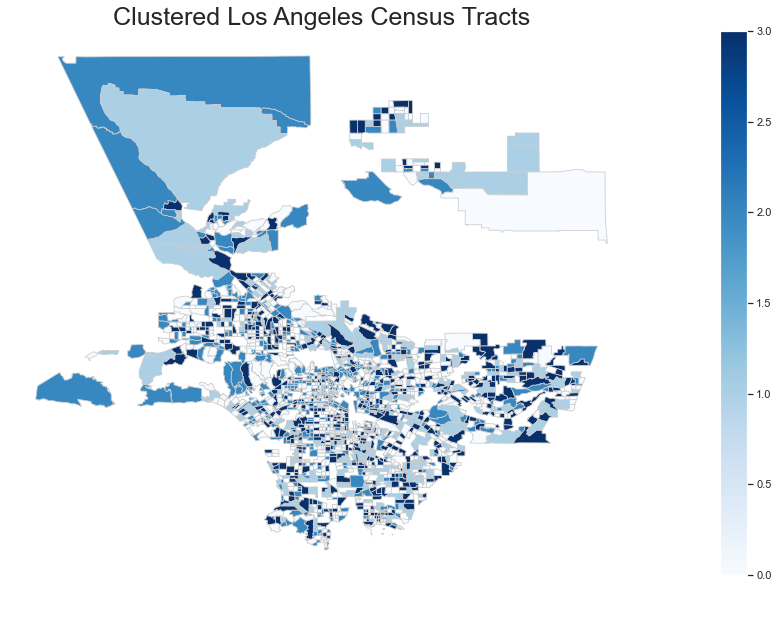

In [88]:
# set the value column that will be visualised
variable = 'cluster'

# set the range for the choropleth values
vmin, vmax = 0, 3

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Clustered Los Angeles Census Tracts', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Data Sources: MRLC.gov and https://healthyplacesindex.org/', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# add the colorbar to the figure
fig.colorbar(sm)
# create map
results1.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
